# [Anthropology 115] 3. Working with Diabetes Data

<br>

**Estimated Time:** 30/45 minutes <br>
**Notebook Developed By:** Amisha Gupta, Manaar Salama, Lan Dinh, Reynolds Zhang <br>

Welcome back! In the previous notebook, we...

insert header image here

Image Source: 


### Learning Outcomes

In this notebook, you will learn about:
- The History and Context of Diabetes Data
- Analyzing and Visualizing Diabetes Data with Python
- Utilizing Google Searches to Discover More About the Medical Data

### Table of Contents
1. [The History and Context of Diabetes Data Collection](#0) <br>
1. [Introduction to the Data](#1) <br>
1. [Looking at Demographic Breakdowns of Diabetes Data](#2) <br>
1. [Looking at Geographical Breakdowns of Diabetes Data](#3) <br>
1. [Utilizing Google Searches to Learn More](#4) <br>
1. [Submitting Your Work](#5)<br>
1. [(Optional) Explore Data Science Opportunities](#6)<br>

As some quick reminders, you will not be expected or required to do any coding yourself in this notebook! The only questions you will be answering are some short answers based on the data and visualizations. These questions that you will be answering are located in the yellow-shaded boxes throughout the notebook.

------------------
## Run the cell below to import all our required materials for this notebook!

In [8]:
# Run this cell by hitting 'Shift + Enter' or using the 'Run' button at the top!
import numpy as np
import pandas as pd
import folium
from re import sub
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, HTML
import otter
grader = otter.Notebook()
import datascience
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
print("Done!")

Done!


-------------
# 1. The History and Context of Diabetes Data Collection <a id='0'></a>

**Notebook 3 Development: I have left what I wrote for Notebook 2 here so that you can see an example of what the history and context section should look like! We basically just want to give a basic intro to what diabetes is / how it affects the lives of people who have it, and how the collection of diabetes data started and has evolved over time. Once you're done with this section, you can delete this cell and all the HIV/AIDS cells in this section.** Potentially good source: https://www.who.int/news-room/fact-sheets/detail/diabetes

First, we should give a brief introduction to what HIV and AIDS are, and the history of data collection for HIV and AIDS.

[HIV](https://www.cdc.gov/hiv/basics/whatishiv.html#:~:text=HIV%20(human%20immunodeficiency%20virus)%20is,care%2C%20HIV%20can%20be%20controlled.) stands for **human immunodeficiency virus**. As its name implies, it is a virus that only infects humans, and it can affect people by weakening their immune system, making their bodies less capable of fighting off viruses and bacteria. If a person with HIV does not treat and control it, **it can lead to AIDS, which stands for acquired immunodeficiency syndrome** and is the most severe stage of HIV. Although HIV cannot be completely cured, it is important for people with HIV to have it treated and controlled. HIV can be transmitted from person to person through contact with infected blood and other certain body fluids.

The first international instances of HIV were seen in the early 1980s (source: [HIV/AIDs Timeline](https://npin.cdc.gov/pages/hiv-and-aids-timeline)). In these early days, they found through research that it could be transmitted through blood. By 1981, they saw the first case of what would become AIDS, or the most severe stage of HIV. By early 1983, the CDC starts to discover that most cases of HIV were comprised of gay men and injection drug users. Around 1988-1989, the CDC started releasing public reports and guidelines on the prevention of transmitting HIV.

Around 1996, **highly active antiretroviral therapy (HAART)** was introduced. Up until this point, deaths related to AIDS had been steadily increasing over the years, but after the introduction of this therapy, deaths caused by AIDS finally started to stagnate and then decrease, despite the continued increase in instances of AIDS.

HIV / AIDS is one example in history of a relatively recent virus that experts and governments started tracking and keeping data on early in its beginning. We saw this process most recently with COVID-19 as well. The tracking of this data early on demonstrated how easy and necessary it is for data to be collected on the cases when new viruses or diseases are seen.

-----------
# 2. Introduction to the Data <a id='1'></a>

**Notebook 3 Development: I have left what I wrote for Notebook 2 here so that you can see an example of what the data introduction section should look like! You may also want to touch on how certain categories / demographics are represented in the dataset (particularly Race/Ethnicity), and how it's not the best way to represent that kind of data. When you complete this section, you can delete this cell and all the HIV/AIDS data intro cells in this section!**

Link to demographic (and potentially regional) data: https://gis.cdc.gov/grasp/diabetes/diabetesatlas-surveillance.html#

For this notebook, we'll be utilizing [one dataset](https://www.census.gov/data-tools/demo/hiv/#/records?s_datacode=R&menu=dual_grid) that comes from the United States Census Bureau. This dataset contains AIDS data on cases and deaths, as well as different demographics of the individuals with AIDS, such as their ages and sexes.

This dataset is large because it contains global information on these cases and deaths from 1979 to 2018. The dataset itself is an aggregation of data collected by thousands of sources over time and across countries. Not only does the data come from different countries, but there are hundreds of geographic regions within individual countries that this data can come from. As you can imagine, this dataset is HUGE!

Although it is amazing that we can have data that is collected from so many different sources across countries and over time, it can also make it hard for the data to be completely conistent and standardized, especially because medical data being collected regarding viruses is a relatively new practice. We will explore some of the issues with consistency in the data in the next section, and it is something you always want to keep in mind when looking at medical data and data in general.

----------------------
# 3. Looking at Demographic Breakdowns of Diabetes Data <a id='2'></a>

**Notebook 3 Development: This section will contain both your manipulation / cleaning of the data as well as the visualizations you create and the questions those visualizations generate. You can focus on just doing the data work, you don't need to worry about adding all the explanatory text or the questions, unless you want to -- I can do those!**

In [38]:
# Run this cell
diabetes = pd.read_csv("data/diabetes_total.csv")
# diabetes
diabetes.tail()

,Year,Total - Percentage,Total - Lower Limit,Total - Upper Limit
17,2017,8.5,8.1,8.9
18,2018,9.1,8.7,9.6
19,2019,8.3,8.0,8.7
20,2020,8.2,7.9,8.6
21,2021,8.5,8.1,8.8


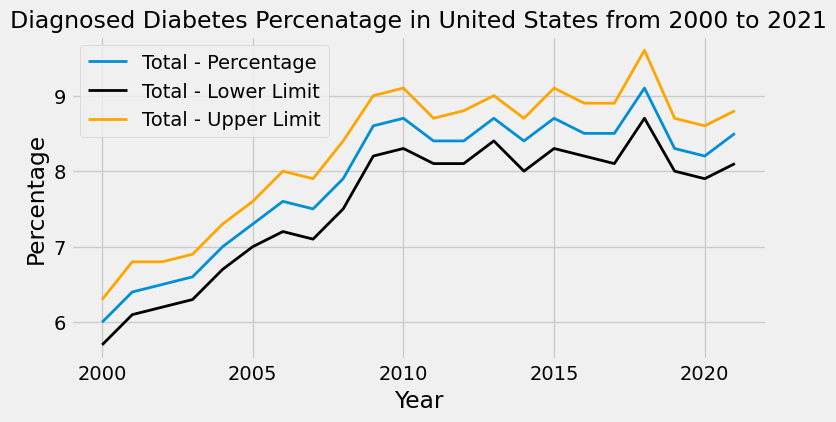

In [44]:
# Run this cell
plt.figure(figsize = (8,4))
sns.lineplot(data = diabetes, x = "Year", y = "Total - Percentage", lw= 2, label ='Total - Percentage')
sns.lineplot(data = diabetes, x = "Year", y = "Total - Lower Limit", lw= 2, color = 'black', label ='Total - Lower Limit')
sns.lineplot(data = diabetes, x = "Year", y = "Total - Upper Limit", lw= 2, color = 'orange', label = 'Total - Upper Limit' )
plt.legend()
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Diagnosed Diabetes Percenatage in United States from 2000 to 2021", fontsize = 17);

In [10]:
diabetes_by_sex = pd.read_csv("data/diabetes_sex.csv")
diabetes_by_sex.head()

,Year,Male - Percentage,Male - Lower Limit,Male - Upper Limit,Female - Percentage,Female - Lower Limit,Female - Upper Limit
0,2000,6.4,6.0,6.9,5.6,5.2,6.0
1,2001,6.9,6.4,7.4,6.1,5.7,6.5
2,2002,7.2,6.7,7.8,6.0,5.6,6.4
3,2003,7.1,6.6,7.6,6.1,5.7,6.5
4,2004,7.5,7.1,8.0,6.5,6.1,6.9


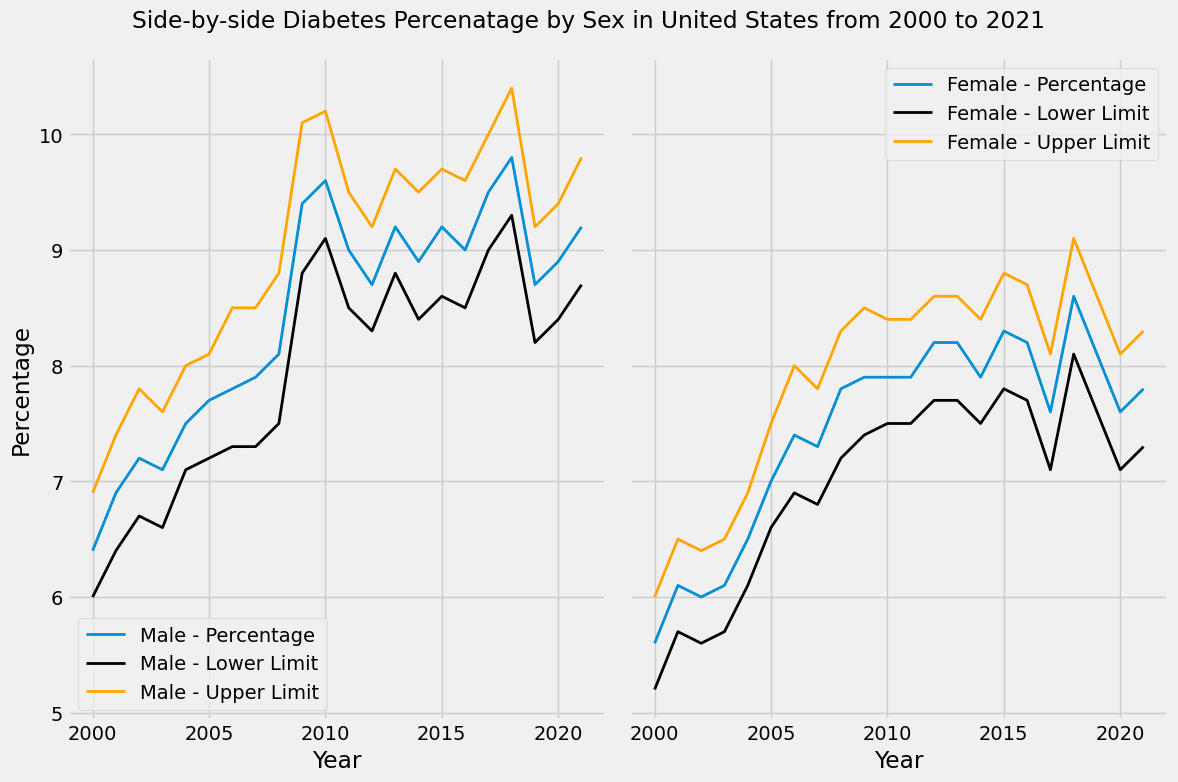

In [104]:
# Plot side-by-side
fig, ax =plt.subplots(1,2, sharey=True, figsize=(12,8))

# Plot Male
sns.lineplot(data = diabetes_by_sex, x = "Year", y = "Male - Percentage", lw= 2, label ='Male - Percentage', ax = ax[0])
sns.lineplot(data = diabetes_by_sex, x = "Year", y = "Male - Lower Limit", lw= 2, color = 'black', label ='Male - Lower Limit', ax = ax[0])
sns.lineplot(data = diabetes_by_sex, x = "Year", y = "Male - Upper Limit", lw= 2, color = 'orange', label = 'Male - Upper Limit', ax = ax[0])
ax[0].legend()
ax[0].set(ylabel='Percentage')

# Plot Female  
sns.lineplot(data = diabetes_by_sex, x = "Year", y = "Female - Percentage", lw= 2, label ='Female - Percentage', ax = ax[1])
sns.lineplot(data = diabetes_by_sex, x = "Year", y = "Female - Lower Limit", lw= 2, color = 'black', label ='Female - Lower Limit', ax = ax[1])
sns.lineplot(data = diabetes_by_sex, x = "Year", y = "Female - Upper Limit", lw= 2, color = 'orange', label = 'Female - Upper Limit', ax = ax[1])
ax[1].legend()

# Set titles
fig.suptitle("Side-by-side Diabetes Percenatage by Sex in United States from 2000 to 2021")
fig.tight_layout()
fig.show();


In [11]:
diabetes_by_edu = pd.read_csv("data/diabetes_education.csv")
diabetes_by_edu.head()

,Year,< High School - Percentage,< High School - Lower Limit,< High School - Upper Limit,High School - Percentage,High School - Lower Limit,High School - Upper Limit,> High School - Percentage,> High School - Lower Limit,> High School - Upper Limit
0,2000,9.2,8.4,10.1,5.9,5.4,6.5,4.8,4.4,5.1
1,2001,9.8,8.9,10.8,7.0,6.4,7.6,4.9,4.5,5.2
2,2002,9.8,8.9,10.7,6.9,6.3,7.4,5.3,4.9,5.7
3,2003,9.2,8.4,10.1,6.1,5.6,6.7,5.9,5.5,6.3
4,2004,9.8,9.1,10.6,7.1,6.6,7.7,5.9,5.4,6.3


In [12]:
diabetes_by_re = pd.read_csv("data/diabetes_re.csv")
diabetes_by_re.head()

,Year,Hispanic - Percentage,Hispanic - Lower Limit,Hispanic - Upper Limit,Non-Hispanic White - Percentage,Non-Hispanic White - Lower Limit,Non-Hispanic White - Upper Limit,Non-Hispanic Black - Percentage,Non-Hispanic Black - Lower Limit,Non-Hispanic Black - Upper Limit,Non-Hispanic Asian - Percentage,Non-Hispanic Asian - Lower Limit,Non-Hispanic Asian - Upper Limit
0,2000,8.8,7.9,9.8,5.2,4.9,5.5,10.1,9.1,11.1,4.5,2.9,6.9
1,2001,9.2,8.2,10.2,5.6,5.3,6.0,10.3,9.3,11.3,5.0,3.4,7.2
2,2002,9.2,8.2,10.4,5.8,5.4,6.1,9.9,8.9,10.9,6.2,4.6,8.4
3,2003,8.5,7.6,9.6,5.9,5.5,6.2,10.0,9.1,11.1,6.3,4.6,8.4
4,2004,10.1,9.1,11.2,6.0,5.7,6.3,11.1,10.1,12.1,7.5,5.8,9.7


--------------------
# 4. Looking at Geographical Breakdowns of Diabetes Data  <a id='3'></a>

**Notebook 3 Development: This section will contain both your manipulation / cleaning of the data as well as the visualizations you create and the questions those visualizations generate. You can focus on just doing the data work, you don't need to worry about adding all the explanatory text or the questions, unless you want to -- I can do those!**

<!-- BEGIN QUESTION -->
<div class="alert alert-warning">

### Question 4.1:
**Before we begin looking at visualizations of our data, what kind of general trends in cases and deaths do you expect to see over time and across different sexes? You can utilize the information we discussed in Section 1, or you can do your own research / use your own knowledge! You don't need to be too specific or do a lot of research on it -- this question is just meant to reflect your initial intuition.**
</div>

*Type your answer here. Double-click to edit this cell and replace this text with your answer. Run this cell to proceed when finished.*

--------------------
# 5. Utilizing Google Searches to Learn More <a id='4'></a>

**Notebook 3 Development: Manaar will probably handle this section, unless someone else really wants to, as I don't have as much helpful development information / expectations.**

<!-- END QUESTION -->
-------------------------
# Congratulations! You Have Completed Notebook 3.

We hope this notebook gave you a fun and interesting look into different data analysis and visualization techniques for exploring diabetes data. In the final notebook, we'll be exploring and asking questions about other medical data. Below, you will find instructions on how to generate a PDF of your written responses to submit!

---------------
# 6. Submitting Your Work  <a id='5'></a>

**Make sure that you've answered all the questions.**

Follow these steps: 
1. Go to `File` in the menu bar, then select `Save and Checkpoint` (or press CTRL+S on the keyboard).
2. Go to `Cell` in the menu bar, then select `Run All`.
3. Click the link produced by the code cell below.
4. Submit the downloaded PDF on bCourses according to your professor's instructions.

**Note:** If clicking the link below doesn't work for you, don't worry! Simply click `File` in the menu, find `Download As`, and choose `PDF via LaTeX (.pdf)` to save a copy of your PDF onto your computer. Alternatively, you can also right click the link and save the link content as a PDF.

**Check the PDF before submitting and make sure all of your answers and any changes are shown.**

In [13]:
# Run this cell
# This may take a few extra seconds.
from otter.export import export_notebook
from IPython.display import display, HTML
export_notebook("Notebook 2 First Draft.ipynb", filtering=True, pagebreaks=False)
display(HTML("<p style='font-size:20px'> <br>Save this notebook, then click <a href='Notebook 2 First Draft.pdf' download>here</a> to open the PDF.<br></p>"))

FileNotFoundError: [Errno 2] No such file or directory: 'Notebook 2 First Draft.ipynb'

------------------
# 7. Explore Data Science Opportunities  <a id='6'></a>

Interested in learning more about how to get involved in data science or coding for data analysis? The following resources might help support your learning:


- Data Science Modules: http://data.berkeley.edu/education/modules

- Data Science Offerings at Berkeley: https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings

- Data 8 Course Information: http://data8.org/

- Data 100 Course Information: https://ds100.org/

----------------------
# 8. Feedback Form

<div class="alert alert-info">
<b> We encourage student to fill out the following feedback form to share your experience with this Module notebook. This feedback form will take no longer than 5 minutes. At UC Berkeley Data Science Undergraduate Studies Modules, we appreciate all feedback to improve the learning of students and experience utilizing Jupyter Notebooks for Data Science Education: </b> 
</div>

# [UC Berkeley Data Science Feedback Form](https://docs.google.com/forms/d/e/1FAIpQLScDK227bq_qLJDLsysk-UOEXy7G6_7YuYHGp2ogzeRBh4OvEw/viewform)